<a href="https://colab.research.google.com/github/falahamro/Violent_Transnational_Social_Movements/blob/main/Step02_Data_Cleaning_and_NLP_Analysis_nodes_attributes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

This notebook combines the previously scraped twitter data, cleans and add any additional columns needed prior to analysis.

# Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import datetime
import networkx as nx
import community as louvain
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import nltk
import warnings
#suppress warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [ ]:
df_connections = pd.read_csv("/content/drive/MyDrive/Social Network Analysis_Freedom Convoy/Final Query/ALL_nodes_connections_to_analysis (3).csv")

In [ ]:
#, lineterminator='\n',dtype=str

In [ ]:
df_connections =  df_connections.rename(columns = {"source" : "author.username"})

In [ ]:
df_connections.head()

,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,referenced_tweets.tweet.id,created_at,author.verified,author.location,author.description,conversation_id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,referenced_tweets.id
0,QwertyDee_,SsWowowo,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18
1,QwertyDee_,1MikeMorris,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18
2,QwertyDee_,CandiceBergenMP,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18
3,Madrussianlives,TruckYouFrudeau,RT @TruckYouFrudeau: Oh good lord your bullshi...,1.495463e+18,1.498142e+18,NaN,1.492918e+18,TruckYouFrudeau,1492917845902118912.0,1498125519451299840.0,2022-02-28 03:44:14,False,NaN,A concerned citizen! Looking for the truth! Th...,1.498142e+18,236.0,587.0,14122.0,1.498126e+18
4,mrosssila,akatelyn19,RT @akatelyn19: Leaky Tank menu in #SarniaON \...,2.536917e+09,1.498142e+18,NaN,2.054286e+08,akatelyn19,205428649.0,1497250155174797312.0,2022-02-28 03:43:36,False,NaN,NaN,1.498142e+18,67.0,183.0,6542.0,1.497250e+18


In [ ]:
df_connections.shape

(55759, 19)

In [ ]:
#df_connections["created_at"] = df_connections["created_at"].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d %H:%M:%S+00:000Z").replace(tzinfo=None))

# NLP Analysis

Use NLP and K-Means to cluster the different topics discussed in the tweets dataset.

# Sentiment Analysis

In [ ]:
df_connections.head(3)

,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,referenced_tweets.tweet.id,created_at,author.verified,author.location,author.description,conversation_id,author.public_metrics.followers_count,author.public_metrics.following_count,author.public_metrics.tweet_count,referenced_tweets.id
0,QwertyDee_,SsWowowo,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18
1,QwertyDee_,1MikeMorris,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18
2,QwertyDee_,CandiceBergenMP,RT @SsWowowo: @1MikeMorris @CandiceBergenMP #C...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,2022-02-28 03:44:41,False,Canada,#WearAMask😷#N95 #DemocracyIsUnderThreat🇨🇦 Disi...,1.498142e+18,5040.0,5536.0,221894.0,1.498072e+18


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import re
nltk.download('vader_lexicon')
from nltk.corpus import sentiwordnet as swn 
from nltk.sentiment.vader import SentimentIntensityAnalyzer

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


In [ ]:
from bs4 import BeautifulSoup
from html import unescape

def remove_urls(x):
    cleaned_string = re.sub(r'(https|http)?:\/\/(\w|\.|\/|\?|\=|\&|\%)*\b', '', str(x), flags=re.MULTILINE)
    return cleaned_string

In [ ]:
def unescape_stuff(x):
    soup = BeautifulSoup(unescape(x), 'lxml')
    return soup.text

In [ ]:
def deEmojify(x):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'', x)

In [ ]:
def remove_symbols(x):
    cleaned_string = re.sub(r"[^a-zA-Z0-9]+", ' ', x)
    return cleaned_string

In [ ]:
def unify_whitespaces(x):
    cleaned_string = re.sub(' +', ' ', x)
    return cleaned_string

In [ ]:
df_connections['text'] = df_connections['text'].str.lower()

In [ ]:
df_connections['text'] = df_connections['text'].apply(remove_urls)
df_connections['text'] = df_connections['text'].apply(unescape_stuff)
df_connections['text'] = df_connections['text'].apply(deEmojify)
df_connections['text'] = df_connections['text'].apply(remove_symbols)
df_connections['text'] = df_connections['text'].apply(unify_whitespaces)

In [ ]:
import spacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
sp = spacy.load('en_core_web_sm')

cachedStopWords = sp.Defaults.stop_words
cachedStopWords = [x.lower() for x in cachedStopWords]
cachedStopWords.extend(list(stopwords.words('english')))
cachedStopWords = list(set(cachedStopWords))

def remove_stopwords(x):
    
    meaningful_words = []
    my_list = x
    
    tokenized_my_list = word_tokenize(my_list) 
    meaningful_words = [w for w in tokenized_my_list if not w in cachedStopWords]
        
    return " ".join(meaningful_words)

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df_connections['text'] = df_connections['text'].apply(remove_stopwords)

In [ ]:
tweets_sents=df_connections.text.values
tweets_words=[]
for x in tweets_sents:
    tweets_words.append(re.split(r'\s+',x))

In [ ]:
#Lower Case
b=[]
c=[]
for x in tweets_words:
    for y in x:
        c.append(y.lower())
    b.append(c); c=[]
tweets_words=b
tweets_words[:3]

[['rt',
  'sswowowo',
  '1mikemorris',
  'candicebergenmp',
  'convoycandice',
  'love',
  'chickenvoy',
  'clownvoy2022',
  'freedomconvoy',
  'ottawastrong',
  'lawandorder'],
 ['rt',
  'sswowowo',
  '1mikemorris',
  'candicebergenmp',
  'convoycandice',
  'love',
  'chickenvoy',
  'clownvoy2022',
  'freedomconvoy',
  'ottawastrong',
  'lawandorder'],
 ['rt',
  'sswowowo',
  '1mikemorris',
  'candicebergenmp',
  'convoycandice',
  'love',
  'chickenvoy',
  'clownvoy2022',
  'freedomconvoy',
  'ottawastrong',
  'lawandorder']]

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloadin

True

In [ ]:
tweets_sents=[]
#Lemmatize using WordNetLemmatizer
for x in tweets_words:
    for y in x:
        lemma= nltk.WordNetLemmatizer()
        c.append(lemma.lemmatize(y))
    tweets_sents.append(c);
tweet_words=tweets_sents;c=[];tweets_sents=[]

In [ ]:
#Remove Stopwords From The Tweets
stopwords=nltk.corpus.stopwords.words('english')
b=[]
c=[]
for x in tweets_words:
    for y in x:
        if y not in stopwords:
            c.append(y)
    b.append(c);c=[]
for x in b:
    tweets_sents.append(' '.join(x))

In [ ]:
#Extract Words And Tweets Only From the Data
b=[]
c=[]
for x in tweets_sents:
    b.append(re.findall(r'#?[a-zA-Z]+',x))
tweets_words=b; tweets_sents=[]
for x in b:
    tweets_sents.append(' '.join(x))
tweets_sents[:5]

['rt sswowowo mikemorris candicebergenmp convoycandice love chickenvoy clownvoy freedomconvoy ottawastrong lawandorder',
 'rt sswowowo mikemorris candicebergenmp convoycandice love chickenvoy clownvoy freedomconvoy ottawastrong lawandorder',
 'rt sswowowo mikemorris candicebergenmp convoycandice love chickenvoy clownvoy freedomconvoy ottawastrong lawandorder',
 'rt truckyoufrudeau oh good lord bullshit knows bounds hear words come mouth trudea',
 'rt akatelyn leaky tank menu sarniaon restaurant followed legislation masks vaccine passports boasted']

In [ ]:
vadler_scores=[]
for x in tweets_sents:
    analyzer=SentimentIntensityAnalyzer()
    vadler_scores.append(analyzer.polarity_scores(x))
vadler_scores[:5]

[{'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369},
 {'neg': 0.0, 'neu': 0.704, 'pos': 0.296, 'compound': 0.6369},
 {'neg': 0.215, 'neu': 0.621, 'pos': 0.164, 'compound': -0.2263},
 {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}]

In [ ]:
vadler_df=pd.DataFrame(vadler_scores)
sentiments=[]
for x in vadler_df['compound']:
    if x<0:
        sentiments.append('Negative');
    elif x==0:
        sentiments.append('Neutral');
    elif x>0:
        sentiments.append('Positive');
vadler_df['Sentiments']=sentiments
vadler_df['Tweets']=tweets_words
vadler_df.head()

,neg,neu,pos,compound,Sentiments,Tweets
0,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
1,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
2,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
3,0.215,0.621,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit..."
4,0.000,1.000,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re..."


In [ ]:
import matplotlib.pyplot as plt

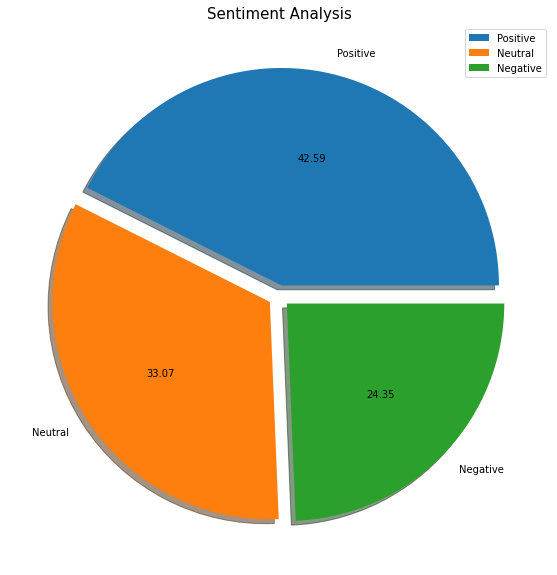

Fig 1.2


In [ ]:
#Pie Chart of sentiments
plt.figure(figsize=(10,10))
plt.title('Sentiment Analysis',size=15)
plt.pie(vadler_df.Sentiments.value_counts().values,labels=['Positive','Neutral','Negative'],explode=[0.05,0.05,0.05],autopct='%.2f', shadow=True)
plt.legend(loc='upper right')
plt.show()
print('Fig 1.2')

<Figure size 720x720 with 0 Axes>

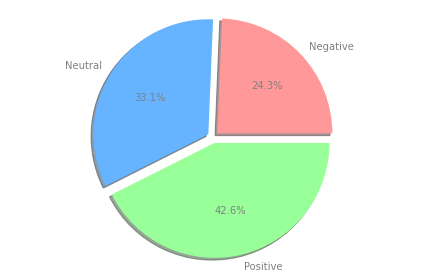

In [ ]:
import matplotlib.pyplot as plt
# Pie chart
plt.figure(figsize=(10,10))

labels = ['Negative', 'Neutral', 'Positive']
sizes = [24.35, 33.07, 42.59]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', explode=[0.05,0.05,0.05], shadow=True)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

Cluster 0 sentiment visualization


<Figure size 720x720 with 0 Axes>

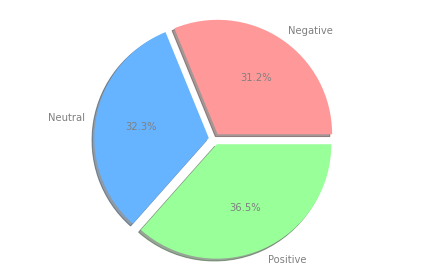

In [ ]:
import matplotlib.pyplot as plt
# Pie chart
plt.figure(figsize=(10,10))

labels = ['Negative', 'Neutral', 'Positive']
sizes = [31.17, 32.29, 36.54]
#colors
colors = ['#ff9999','#66b3ff','#99ff99']
 
fig1, ax1 = plt.subplots()
patches, texts, autotexts = ax1.pie(sizes, colors = colors, labels=labels, autopct='%1.1f%%', explode=[0.05,0.05,0.05], shadow=True)
for text in texts:
    text.set_color('grey')
for autotext in autotexts:
    autotext.set_color('grey')
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

In [ ]:
#Adding Sr.No. column to valder_df
vadler_df = vadler_df.reset_index()
vadler_df = vadler_df.rename(columns={"index":"Sr.No."})
vadler_df['Sr.No.'] = vadler_df.index + 0

In [ ]:
vadler_df.head()

,Sr.No.,neg,neu,pos,compound,Sentiments,Tweets
0,0,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
1,1,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
2,2,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
3,3,0.215,0.621,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit..."
4,4,0.000,1.000,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re..."


In [ ]:
df_connections = pd.concat([df_connections, vadler_df], axis=1)

In [ ]:
df_connections

,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,referenced_tweets.tweet.id,...,author.public_metrics.following_count,author.public_metrics.tweet_count,referenced_tweets.id,Sr.No.,neg,neu,pos,compound,Sentiments,Tweets
0,QwertyDee_,SsWowowo,rt sswowowo 1mikemorris candicebergenmp convoy...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,...,5536.0,221894.0,1.498072e+18,0,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
1,QwertyDee_,1MikeMorris,rt sswowowo 1mikemorris candicebergenmp convoy...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,...,5536.0,221894.0,1.498072e+18,1,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
2,QwertyDee_,CandiceBergenMP,rt sswowowo 1mikemorris candicebergenmp convoy...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,1498072291153874944.0,...,5536.0,221894.0,1.498072e+18,2,0.000,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co..."
3,Madrussianlives,TruckYouFrudeau,rt truckyoufrudeau oh good lord bullshit knows...,1.495463e+18,1.498142e+18,NaN,1.492918e+18,TruckYouFrudeau,1492917845902118912.0,1498125519451299840.0,...,587.0,14122.0,1.498126e+18,3,0.215,0.621,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit..."
4,mrosssila,akatelyn19,rt akatelyn19 leaky tank menu sarniaon restaur...,2.536917e+09,1.498142e+18,NaN,2.054286e+08,akatelyn19,205428649.0,1497250155174797312.0,...,183.0,6542.0,1.497250e+18,4,0.000,1.000,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55754,Stand_Records,ChiefsofMayhem,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,1495184585608544259,...,143.0,27.0,1.495185e+18,55754,0.000,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil..."
55755,Stand_Records,BreitbartNews,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,1495184585608544259,...,143.0,27.0,1.495185e+18,55755,0.000,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil..."
55756,Stand_Records,KillWillC,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,1495184585608544259,...,143.0,27.0,1.495185e+18,55756,0.000,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil..."
55757,Stand_Records,RealBrysonGray,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,1495184585608544259,...,143.0,27.0,1.495185e+18,55757,0.000,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil..."


# Word2Vec Modeling

In [ ]:
import numpy as np
import string
import re
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline
from gensim.models.word2vec import Word2Vec
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models import Word2Vec
from sklearn.decomposition import PCA
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from nltk.corpus import stopwords
import re
import gensim

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def preprocess(text):
    text_input = re.sub('[^a-zA-Z1-9]+', ' ', str(text))
    output = re.sub(r'\d+', '',text_input)
    return output.lower().strip()

df_connections['text'] = df_connections.text.map(preprocess)
#df_connections

In [ ]:
stop = set(stopwords.words("english"))

def remove_stopwords(text):
    filtered_words = [word.lower() for word in text.split() if word.lower() not in stop]
    return " ".join(filtered_words)

df_connections['text'] = df_connections.text.map(remove_stopwords)
#df_connections

In [ ]:
def build_corpus(df):
    corpus = []
    for sentence in df.iteritems():
        word_list = sentence[1].split(" ")
        corpus.append(word_list)
    return corpus

corpus = build_corpus(df_connections['text'])

In [ ]:
model = Word2Vec(corpus, size=100, min_count=1)

In [ ]:
model.wv.save_word2vec_format('word2vec_embedding.bin', binary=True)

Word2Vec Clustering

In [ ]:
import pandas as pd
import numpy as np
import string
import re
import pickle
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.pipeline import Pipeline
from gensim.models.keyedvectors import KeyedVectors
from gensim.models import Word2Vec
import matplotlib.pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [ ]:
abst_list = df_connections['text'].values.astype('U')

In [ ]:
#preprocessing for pubmed data
nopunc = str.maketrans('', '', string.punctuation)
lem = WordNetLemmatizer()
custom_stopwords = set(stopwords.words("english")+ [])
custom_stopwords = [lem.lemmatize(word) for word in custom_stopwords]

In [ ]:
def preprocess(abst_list):
    abstracts =[]
    for line in abst_list:
        line.replace("\n", "")
        line = line.lower()
        line = line.translate(nopunc)
        line = re.sub('[^A-Za-z]', ' ', line)
        new = ' '
        for word in line.split():
            word = lem.lemmatize(word)
            if word not in custom_stopwords and len(word)>3:
                new = new + ' ' + word
        abstracts.append(new)
    return abstracts

In [ ]:
abstract_list = preprocess(abst_list)

In [ ]:
abstract_list[0]

'  sswowowo mikemorris candicebergenmp convoycandice love chickenvoy clownvoy freedomconvoy ottawastrong lawandorder'

In [ ]:
def tokenizer(abst_list):
    abstract_tokens =[]
    for line in abst_list:
        tokens = word_tokenize(line)
        tokens = [t for t in tokens if len(t) > 3]
        abstract_tokens.append(tokens)
    return abstract_tokens

In [ ]:
abstract_tokens = tokenizer(abstract_list)

** Word Vectotization**

In [ ]:
vectorizer = KeyedVectors.load_word2vec_format('word2vec_embedding.bin', binary=True)

In [ ]:
def w2v_vectorizer(list_of_docs, model):
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model:
                try:
                    vectors.append(model[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [ ]:
text_vectors = w2v_vectorizer(abstract_tokens,vectorizer)

# Model building

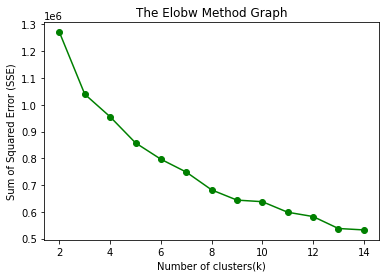

In [ ]:
# checking for optimal number of clusters
sse = []
list_k = list(range(2,15))

for k in list_k:
    km = MiniBatchKMeans(init='k-means++',n_clusters = k,random_state=0,n_init=20,max_iter=1000)
    km.fit(text_vectors)
    sse.append(km.inertia_)

plt.plot(range(2, 15), sse, 'go-')
plt.title('The Elobw Method Graph')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Sum of Squared Error (SSE)')
plt.show()

In [ ]:
k = 4
k_means = MiniBatchKMeans(init='k-means++',n_clusters = k,random_state=0,n_init=20,max_iter=1000)
k_means.fit(text_vectors)

MiniBatchKMeans(max_iter=1000, n_clusters=4, n_init=20, random_state=0)

# Visualization

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2,random_state=0)
reduced_vectors = pca.fit_transform(text_vectors)
reduced_clusters = pca.fit_transform(k_means.cluster_centers_)

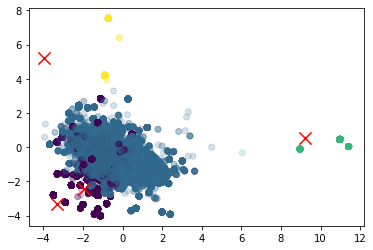

In [ ]:
plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1],c=k_means.labels_, alpha=0.2)
plt.scatter(reduced_clusters[:, 0],reduced_clusters[:, 1], marker='x', s=150, c='r')

# Top words from each cluster

In [ ]:
df_connections['preprocessed_abstract'] = abstract_list
df_connections['labels'] = k_means.labels_
df_connections['labels'].value_counts()

1    40032
0     8747
3     3732
2     3248
Name: labels, dtype: int64

In [ ]:
def get_top_n_words(corpus, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in   vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [ ]:
def get_wordcloud(text):
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

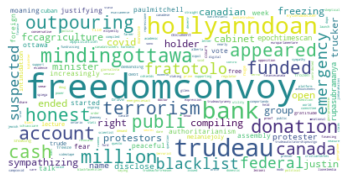

Top 10 words from cluster 0 :
['freedomconvoy', 'trudeau', 'hollyanndoan', 'bank', 'mindingottawa', 'million', 'account', 'donation', 'terrorism', 'appeared']


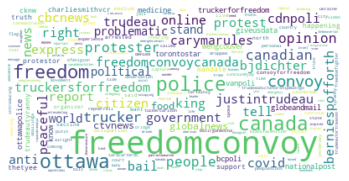

Top 10 words from cluster 1 :
['freedomconvoy', 'police', 'canada', 'ottawa', 'freedom', 'convoy', 'trucker', 'opinion', 'canadian', 'people']


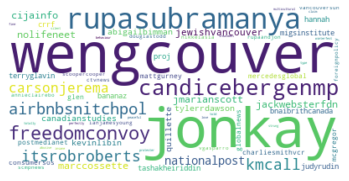

Top 10 words from cluster 2 :
['wengcouver', 'jonkay', 'rupasubramanya', 'candicebergenmp', 'freedomconvoy', 'airbnbsnitchpol', 'kmcall', 'itsrobroberts', 'carsonjerema', 'nationalpost']


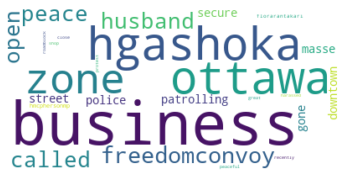

Top 10 words from cluster 3 :
['business', 'hgashoka', 'ottawa', 'zone', 'freedomconvoy', 'husband', 'called', 'open', 'peace', 'police']


In [ ]:
from wordcloud import WordCloud
for clus in range (4):
    text =' '
    df2 = df_connections.loc[df_connections["labels"]==clus]
    
    #wordcloud
    for abst in df2.preprocessed_abstract:
        text += abst
    get_wordcloud(text)
    
    #top10words
    words = []
    for i, j in get_top_n_words(df2["preprocessed_abstract"],10):
        words.append(i)
    print ("Top 10 words from cluster",clus,":")
    print (words)

In [ ]:
pip install -U yellowbrick

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# initialize the vectorizer 

vectorizer = TfidfVectorizer(sublinear_tf=True, min_df=5, max_df=0.95)


X = vectorizer.fit_transform(df_connections['preprocessed_abstract'])

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
from yellowbrick.cluster import SilhouetteVisualizer

In [ ]:
from sklearn.cluster import KMeans

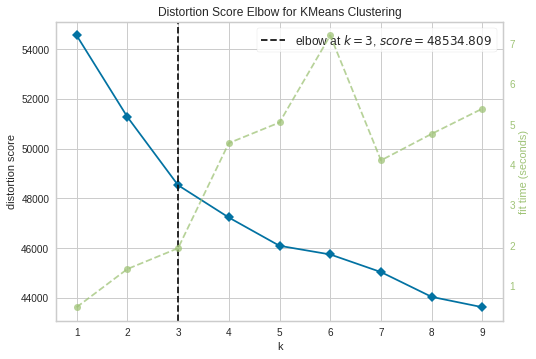

In [ ]:
visualizer = KElbowVisualizer(KMeans(init="k-means++", random_state=42), k=(1, 10))
visualizer.fit(X)        
visualizer.show() 

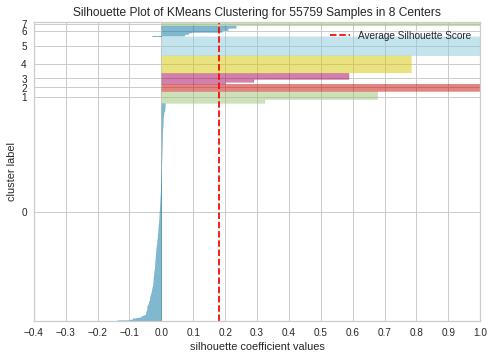

In [ ]:
visualizer = SilhouetteVisualizer(KMeans(init="k-means++", random_state=42), colors='yellowbrick')
visualizer.fit(X)        
visualizer.show() 

In [ ]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
#pass X to the pca and store the reduced vectors into pca_vecs 
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:
# assign clusters and pca vectors to our dataframe 

df_connections['clusters'] = k_means.labels_
df_connections['x0'] = x0
df_connections['x1'] = x1

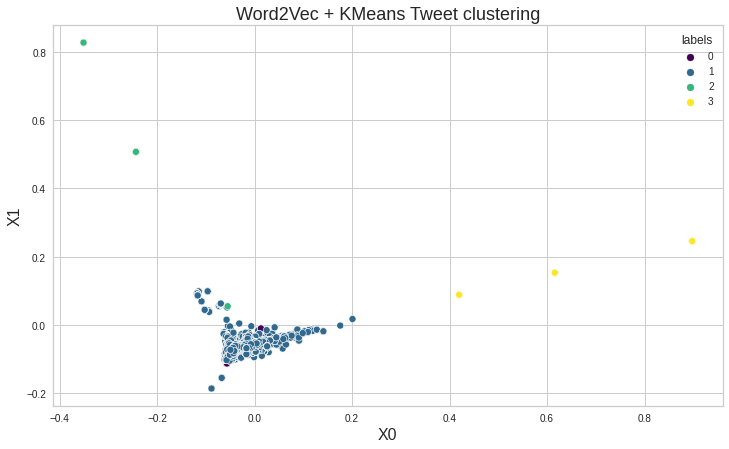

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("Word2Vec + KMeans Tweet clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=df_connections, x='x0', y='x1', hue='labels', palette="viridis")
plt.show()

In [ ]:
#df_connections.head()

In [ ]:
#for i in range(df_connections.shape[0]) :
#     if (df_connections.iloc[i]["clusters"] == 1) :
#         print("Cluster:", df_connections.iloc[i]["clusters"])
#         print(df_connections.iloc[i]["text"])
#         print("------------")

After looking through the different clusters and its separations, we have determined that the tweet categories can be separated fairly well with only 5 clusters. Therefore, only the results of the 5 clusters are kept.

In [ ]:
#join the 5_cluster separation with tweet data
#nlp_clusters = pd.DataFrame(tweets["5_clusters"])
#nlp_clusters = nlp_clusters.rename(columns = {"5_clusters" : "nlp_clusters"})
#df_connections = df_connections.join(nlp_clusters, on = "id")

In [ ]:
df_connections = df_connections.reset_index()

In [ ]:
# label clusters with their relevant categories
df_connections["clusters"] = df_connections["clusters"].astype(str)
df_connections["clusters"] = df_connections["clusters"].replace({"0" : "Anti-gov rhetoric",
                                                                 "1" : "FreedomConvoy Funding",
                                                                 "2" : "Movement",
                                                                 "3" : "Gov-policy",
                                                                 "4" : "Protest",
                                                                 "5" : "Political Rhetoric",
                                                                 "6" : "Police",
                                                                 "7" : "Vaccine-Liberty",
                                                              
                                                                         })

In [ ]:
df_connections.to_csv("/content/drive/MyDrive/Social Network Analysis_Freedom Convoy/Final Query/ALL_nodes_connections_final_after_content_analysis_8_clusters.csv", index=False)

In [ ]:
df_connections.loc[df_connections['author.username'] == 'QwertyDee_']

,index,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,...,neu,pos,compound,Sentiments,Tweets,preprocessed_abstract,labels,clusters,x0,x1
0,0,QwertyDee_,SsWowowo,rt sswowowo mikemorris candicebergenmp convoyc...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
1,1,QwertyDee_,1MikeMorris,rt sswowowo mikemorris candicebergenmp convoyc...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
2,2,QwertyDee_,CandiceBergenMP,rt sswowowo mikemorris candicebergenmp convoyc...,20917723.0,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
19169,19169,QwertyDee_,CarymaRules,rt carymarules reason worried type trojan hors...,20917723.0,1.496333e+18,NaN,7.997172e+17,CarymaRules,799717156589965312.0,...,0.784,0.000,-0.2960,Negative,"[rt, carymarules, reason, worried, type, troja...",carymarules reason worried type trojan horse...,1,FreedomConvoy Funding,-0.055129,-0.053866
55688,55688,QwertyDee_,crypticvalentin,rt crypticvalentin tamaralich radar canadian a...,20917723.0,1.495190e+18,NaN,1.767424e+07,crypticvalentin,17674244,...,0.625,0.000,-0.7184,Negative,"[rt, crypticvalentin, tamaralich, radar, canad...",crypticvalentin tamaralich radar canadian an...,1,FreedomConvoy Funding,-0.045767,-0.071380


# Word2Vec

In [ ]:
w2v_df = df_connections.copy()

In [ ]:
w2v_df

,index,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,...,neu,pos,compound,Sentiments,Tweets,preprocessed_abstract,labels,clusters,x0,x1
0,0,QwertyDee_,SsWowowo,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
1,1,QwertyDee_,1MikeMorris,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
2,2,QwertyDee_,CandiceBergenMP,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.704,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644
3,3,Madrussianlives,TruckYouFrudeau,rt truckyoufrudeau oh good lord bullshit knows...,1.495463e+18,1.498142e+18,NaN,1.492918e+18,TruckYouFrudeau,1492917845902118912.0,...,0.621,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit...",truckyoufrudeau good lord bullshit know boun...,1,FreedomConvoy Funding,-0.043654,-0.065874
4,4,mrosssila,akatelyn19,rt akatelyn leaky tank menu sarniaon restauran...,2.536917e+09,1.498142e+18,NaN,2.054286e+08,akatelyn19,205428649.0,...,1.000,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re...",akatelyn leaky tank menu sarniaon restaurant...,1,FreedomConvoy Funding,-0.043562,-0.065456
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55754,55754,Stand_Records,ChiefsofMayhem,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,...,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil...",chiefsofmayhem breitbartnews check killwillc...,1,FreedomConvoy Funding,-0.016585,-0.067808
55755,55755,Stand_Records,BreitbartNews,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,...,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil...",chiefsofmayhem breitbartnews check killwillc...,1,FreedomConvoy Funding,-0.016585,-0.067808
55756,55756,Stand_Records,KillWillC,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,...,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil...",chiefsofmayhem breitbartnews check killwillc...,1,FreedomConvoy Funding,-0.016585,-0.067808
55757,55757,Stand_Records,RealBrysonGray,chiefsofmayhem breitbartnews check killwillc r...,1.471235e+18,1.495189e+18,2792704009,2.792704e+09,ChiefsofMayhem,2792704009,...,0.781,0.219,0.6369,Positive,"[chiefsofmayhem, breitbartnews, check, killwil...",chiefsofmayhem breitbartnews check killwillc...,1,FreedomConvoy Funding,-0.016585,-0.067808


In [ ]:
tokenized_tweet = w2v_df['text'].apply(lambda x: x.split()) # tokenizing 

In [ ]:
tokenized_tweet = w2v_df['preprocessed_abstract'].apply(lambda x: x.split()) # tokenizing 

In [ ]:
w2v_df['preprocessed_abstract']

0          sswowowo mikemorris candicebergenmp convoyca...
1          sswowowo mikemorris candicebergenmp convoyca...
2          sswowowo mikemorris candicebergenmp convoyca...
3          truckyoufrudeau good lord bullshit know boun...
4          akatelyn leaky tank menu sarniaon restaurant...
                               ...                        
55754      chiefsofmayhem breitbartnews check killwillc...
55755      chiefsofmayhem breitbartnews check killwillc...
55756      chiefsofmayhem breitbartnews check killwillc...
55757      chiefsofmayhem breitbartnews check killwillc...
55758      chiefsofmayhem breitbartnews check killwillc...
Name: preprocessed_abstract, Length: 55759, dtype: object

# Build word2vec model

In [ ]:
import gensim

In [ ]:
w2v_model = gensim.models.Word2Vec(tokenized_tweet, size=100, window=6, min_count=3, sg = 1, hs = 0, negative = 10, workers=32, seed = 34)

w2v_model.train(tokenized_tweet, total_examples= len(w2v_df['preprocessed_abstract']), epochs=20)

(12926692, 15735120)

In [ ]:
from nltk.cluster import KMeansClusterer
from sklearn import cluster
from sklearn import metrics

In [ ]:
from nltk.cluster import KMeansClusterer
from sklearn import cluster
from sklearn import metrics

Z = w2v_model[w2v_model.wv.vocab]

NUM_CLUSTERS=7
kclusterer = KMeansClusterer(NUM_CLUSTERS, distance=nltk.cluster.util.cosine_distance, repeats=25)
assigned_clusters = kclusterer.cluster(Z, assign_clusters=True)
 
words = list(w2v_model.wv.vocab)

kmeans = cluster.KMeans(n_clusters=NUM_CLUSTERS)
kmeans.fit(X)
 
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [ ]:
# put labels into the original dataset
w2v_df['KMeans_w2v_2'] = kmeans.labels_

In [ ]:
w2v_df.head()

,index,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,...,pos,compound,Sentiments,Tweets,preprocessed_abstract,labels,clusters,x0,x1,KMeans_w2v_2
0,0,QwertyDee_,SsWowowo,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644,0
1,1,QwertyDee_,1MikeMorris,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644,0
2,2,QwertyDee_,CandiceBergenMP,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,FreedomConvoy Funding,-0.049729,-0.029644,0
3,3,Madrussianlives,TruckYouFrudeau,rt truckyoufrudeau oh good lord bullshit knows...,1.495463e+18,1.498142e+18,NaN,1.492918e+18,TruckYouFrudeau,1492917845902118912.0,...,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit...",truckyoufrudeau good lord bullshit know boun...,1,FreedomConvoy Funding,-0.043654,-0.065874,0
4,4,mrosssila,akatelyn19,rt akatelyn leaky tank menu sarniaon restauran...,2.536917e+09,1.498142e+18,NaN,2.054286e+08,akatelyn19,205428649.0,...,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re...",akatelyn leaky tank menu sarniaon restaurant...,1,FreedomConvoy Funding,-0.043562,-0.065456,0


In [ ]:
#w2v_df.to_csv("visualization_pca.cvs")

In [ ]:
# initialize PCA with 2 components
pca = PCA(n_components=2, random_state=42)
#pass X to the pca and store the reduced vectors into pca_vecs 
pca_vecs = pca.fit_transform(X.toarray())
# save our two dimensions into x0 and x1

x0 = pca_vecs[:, 0]
x1 = pca_vecs[:, 1]

In [ ]:

# assign clusters and pca vectors to our dataframe 

w2v_df['clusters'] = kmeans.labels_
w2v_df['x0'] = x0
w2v_df['x1'] = x1

In [ ]:
w2v_df.head()

,index,author.username,target,text,author_id,id,in_reply_to_user_id,referenced_tweets.tweet.author.id,referenced_tweets.tweet.author.username,referenced_tweets.tweet.author_id,...,pos,compound,Sentiments,Tweets,preprocessed_abstract,labels,clusters,x0,x1,KMeans_w2v_2
0,0,QwertyDee_,SsWowowo,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,0,-0.049729,-0.029644,0
1,1,QwertyDee_,1MikeMorris,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,0,-0.049729,-0.029644,0
2,2,QwertyDee_,CandiceBergenMP,rt sswowowo mikemorris candicebergenmp convoyc...,2.091772e+07,1.498142e+18,NaN,7.133665e+17,SsWowowo,713366495527481344.0,...,0.296,0.6369,Positive,"[rt, sswowowo, mikemorris, candicebergenmp, co...",sswowowo mikemorris candicebergenmp convoyca...,1,0,-0.049729,-0.029644,0
3,3,Madrussianlives,TruckYouFrudeau,rt truckyoufrudeau oh good lord bullshit knows...,1.495463e+18,1.498142e+18,NaN,1.492918e+18,TruckYouFrudeau,1492917845902118912.0,...,0.164,-0.2263,Negative,"[rt, truckyoufrudeau, oh, good, lord, bullshit...",truckyoufrudeau good lord bullshit know boun...,1,0,-0.043654,-0.065874,0
4,4,mrosssila,akatelyn19,rt akatelyn leaky tank menu sarniaon restauran...,2.536917e+09,1.498142e+18,NaN,2.054286e+08,akatelyn19,205428649.0,...,0.000,0.0000,Neutral,"[rt, akatelyn, leaky, tank, menu, sarniaon, re...",akatelyn leaky tank menu sarniaon restaurant...,1,0,-0.043562,-0.065456,0


##visualization

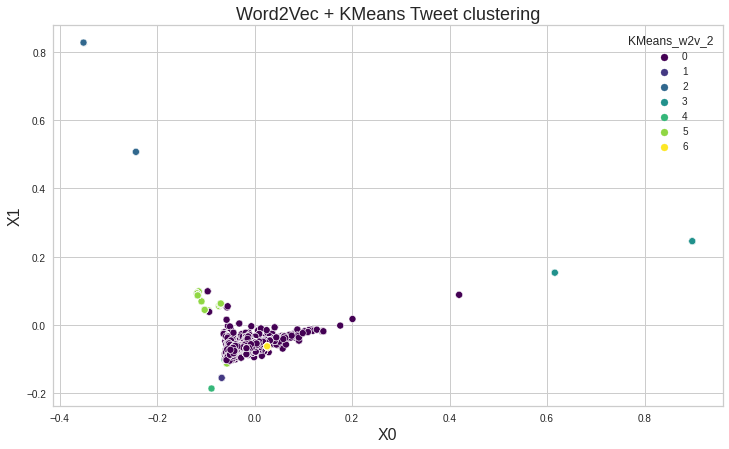

In [ ]:
# set image size
plt.figure(figsize=(12, 7))
# set a title
plt.title("Word2Vec + KMeans Tweet clustering", fontdict={"fontsize": 18})
# set axes names
plt.xlabel("X0", fontdict={"fontsize": 16})
plt.ylabel("X1", fontdict={"fontsize": 16})
# create scatter plot with seaborn, where hue is the class used to group the data
sns.scatterplot(data=w2v_df, x='x0', y='x1', hue='KMeans_w2v_2', palette="viridis")
plt.show()

In [ ]:
from sklearn.decomposition import PCA
#pca = PCA(n_components=2, random_state=0)
#reduced_vectors = pca.fit_transform(x.toarray)
#reduced_clusters = pca.fit_transform(kmeans.cluster_centers_)

In [ ]:
#plt.scatter(reduced_vectors[:,0],reduced_vectors[:,1],c=k_means.labels_, alpha=0.2)
#plt.scatter(reduced_clusters[:, 0],reduced_clusters[:, 1], marker='x', s=150, c='r')

In [ ]:
my_cluster={}
for i, word in enumerate(words):  
    my_cluster[word] = str(assigned_clusters[i])

from collections import defaultdict 
  
res = defaultdict(list) 
for key, val in sorted(my_cluster.items()): 
    res[val].append(key) 
      
for key,value in dict(res).items():
    print("Group",key,":",value)
    print() 

Group 5 : ['aanhoud', 'aaronjcarpenter', 'abigailbimman', 'absolut', 'abusive', 'abzeichen', 'accura', 'actuales', 'addiction', 'adding', 'admiraci', 'adolftrudeau', 'adopt', 'adriannov', 'adversereactions', 'advertise', 'affaire', 'agentninednine', 'agirlky', 'agressivement', 'ahora', 'airbnbsnitchpol', 'akatelyn', 'aktivisten', 'alain', 'alancelin', 'albernap', 'albertaseparation', 'albertgrooms', 'alertdc', 'aliena', 'alit', 'alles', 'alors', 'alright', 'altijd', 'amandalaurenm', 'americascotty', 'amerika', 'amid', 'analogy', 'anda', 'andaue', 'andrewbostom', 'angb', 'annakhait', 'anname', 'annieclairebo', 'anniezgone', 'announcement', 'antagonismus', 'antenne', 'anthonyzenkus', 'antigubernamentales', 'aplicando', 'apoyo', 'apvogt', 'aragon', 'arbore', 'arctic', 'arealsoulrebel', 'arielangel', 'arkimedies', 'armastrangelo', 'arrestaties', 'arservativemom', 'articolo', 'artinstantly', 'artvalley', 'asociada', 'atascando', 'attjekuiken', 'aubrey', 'auch', 'australian', 'ausweiten', 'a

Identifying the Similarity between the tweets.


In [ ]:
def w2v(s1,s2,wordmodel):
            if s1==s2:
                    return 1.0
            s1words=s1.split()
            s2words=s2.split()
            
            s1wordsset=set(s1words)
            s2wordsset=set(s2words)
            
            vocab = wordmodel.wv.vocab #the vocabulary considered in the word embeddings
         
            for word in s1wordsset.copy(): #remove sentence words not found in the vocab
                    if (word not in vocab):
                            s1words.remove(word)
            for word in s2wordsset.copy(): 
                    if (word not in vocab):
                            s2words.remove(word)
            print(s1words)
            print(s2words)
            return wordmodel.wv.n_similarity(s1words, s2words)

In [ ]:
s1=w2v_df['preprocessed_abstract'][233]
s2=w2v_df['preprocessed_abstract'][543]

In [ ]:
s1

'  giveusdata cdnpoli bcpoli vanpoli charliesmithvcr wengcouver cbcnews ctvnews globalnews torontostar globeandmail thetyee nationalpost cknw news canada covid death death freedomconvoy arrived ottawa'

In [ ]:
s2

'  newsweek cbsnews cbseveningnews people washingtonpost oann gannett realdailywire miamiherald guardian breaknnews usnews theadvocatebr skynews theatlantic houstonchron freedomconvoy'

In [ ]:
w2v(s1,s2, w2v_model)

['giveusdata', 'cdnpoli', 'bcpoli', 'vanpoli', 'charliesmithvcr', 'wengcouver', 'cbcnews', 'ctvnews', 'globalnews', 'torontostar', 'globeandmail', 'thetyee', 'nationalpost', 'cknw', 'news', 'canada', 'covid', 'death', 'death', 'freedomconvoy', 'arrived', 'ottawa']
['newsweek', 'cbsnews', 'cbseveningnews', 'people', 'washingtonpost', 'oann', 'gannett', 'realdailywire', 'miamiherald', 'guardian', 'breaknnews', 'usnews', 'theadvocatebr', 'skynews', 'theatlantic', 'houstonchron', 'freedomconvoy']


0.4850011

In [ ]:
w2v_model.wv.most_similar("moral")

[('tendency', 0.8010781407356262),
 ('narcissistic', 0.7779702544212341),
 ('manner', 0.7365841865539551),
 ('sycophantic', 0.6866936087608337),
 ('destroyed', 0.6081255674362183),
 ('launderers', 0.5967562198638916),
 ('barricaded', 0.5573650598526001),
 ('alleged', 0.556757926940918),
 ('rational', 0.5509686470031738),
 ('acting', 0.5492039918899536)]